In [136]:
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
from qiskit.quantum_info import Statevector


# Fig 1

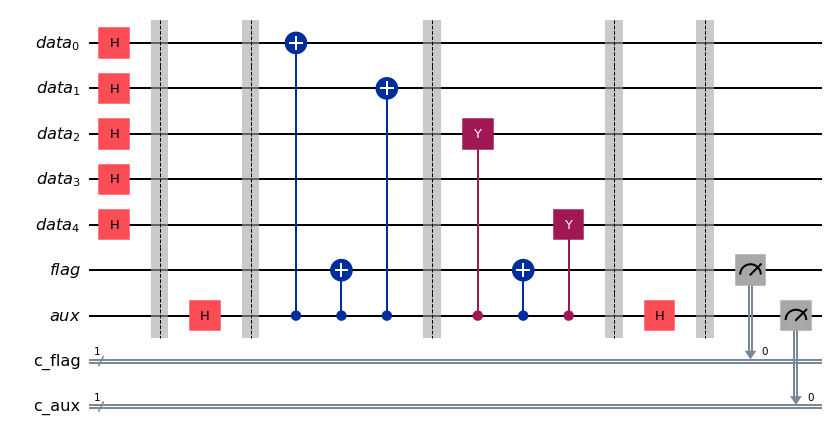

In [137]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   

circuit = QuantumCircuit(data, flag, aux, c_flag, c_aux) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

circuit.measure(flag[0], c_flag[0])
circuit.measure(aux[0], c_aux[0])

circuit.draw('mpl')


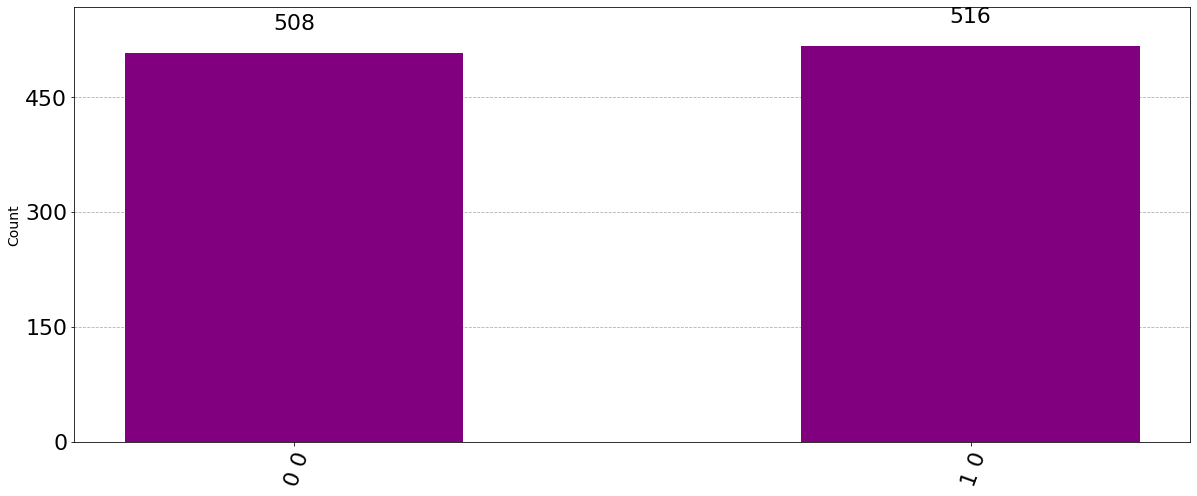

In [138]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Without an Error

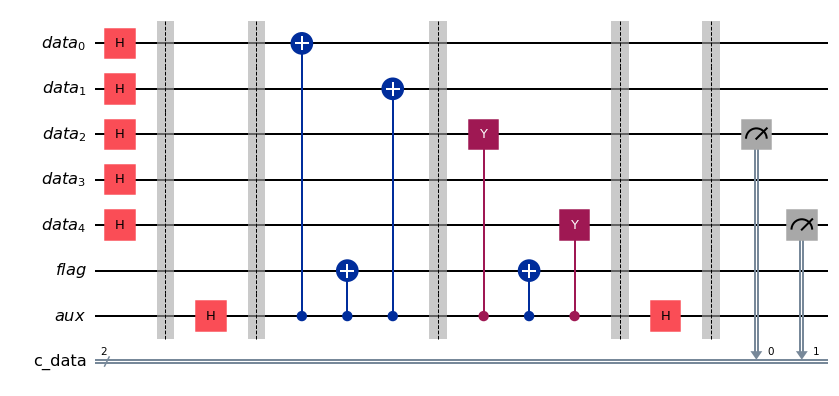

In [139]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, flag, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

circuit.measure(data[2], c_data[0])
circuit.measure(data[4], c_data[1])


circuit.draw('mpl')


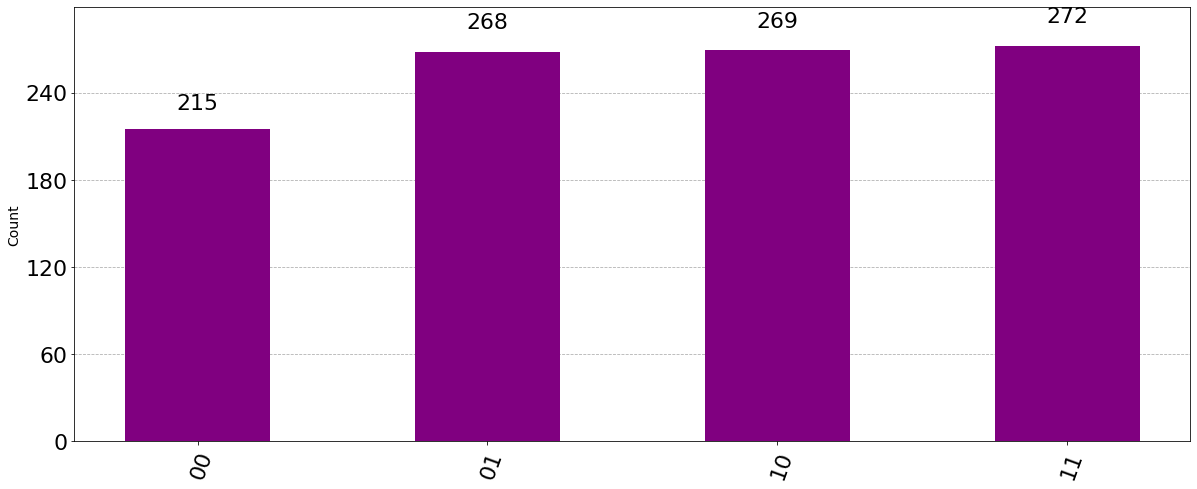

In [140]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Introducing a Pauli Error Does not work rn

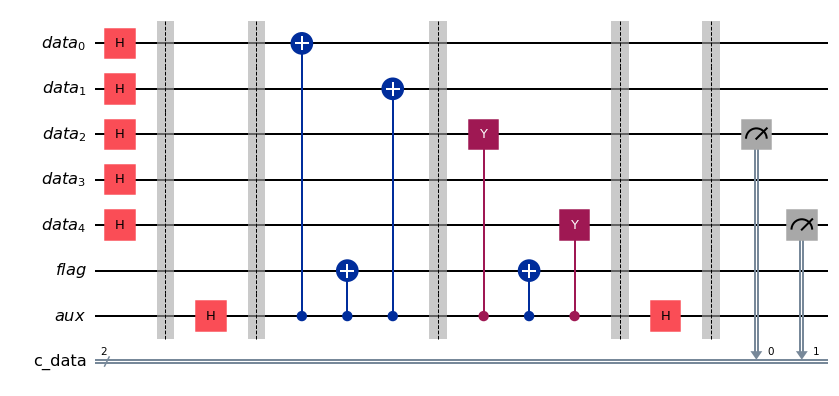

In [141]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(5, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, flag, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

for i in range(5):
    circuit.h(data[i])

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.y(aux[0])
#circuit.z(aux[0])
#circuit.x(aux[0])
#circuit.z(aux[0])

circuit.cy(aux[0], data[2])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[4])

circuit.barrier()

circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

circuit.measure(data[2], c_data[0])
circuit.measure(data[4], c_data[1])


circuit.draw('mpl')


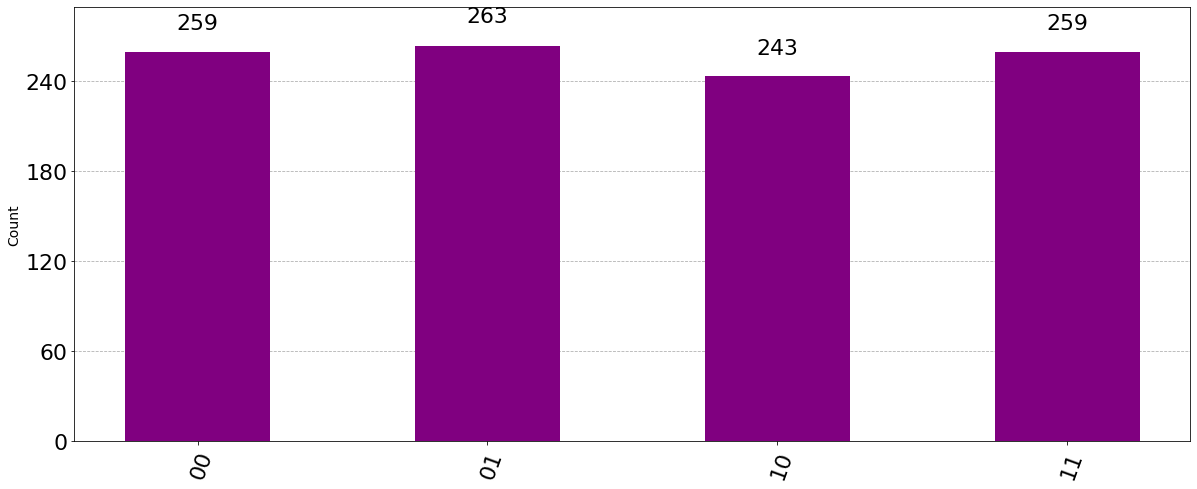

In [142]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

### Switching to Depolarizing Noise/Random Noise/Magic and Experimenting with Statevectors 

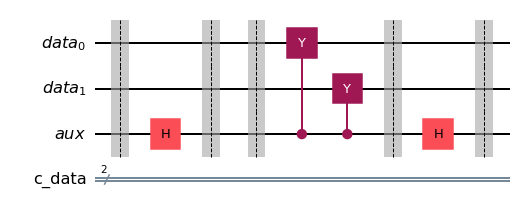

In [227]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
#circuit.measure(aux[0], c_aux[0])

#$circuit.measure(data[0], c_data[0])
#circuit.measure(data[1], c_data[1])


circuit.draw('mpl')


In [228]:
statevector = Statevector(circuit)
print(statevector)
statevector.probabilities_dict()

Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j,
              0. +0.j,  0.5+0.j],
            dims=(2, 2, 2))


{'000': 0.2499999999999999,
 '011': 0.2499999999999999,
 '100': 0.2499999999999999,
 '111': 0.2499999999999999}

### Going to add a depolarizing noise channel because it is easier

In [229]:
circuit.x(data[0])

#Noise Model
noise_model = NoiseModel()

#Depolarizing Error with 1 means fully error-ized
depol_error = depolarizing_error(1, num_qubits=1)

noise_model.add_quantum_error(depol_error, ['id'], [0])  # Qubit 2 = aux[0]

In [230]:
statevector = Statevector(circuit)
print(statevector)
statevector.probabilities_dict()

Statevector([ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j,
              0.5+0.j,  0. +0.j],
            dims=(2, 2, 2))


{'001': 0.2499999999999999,
 '010': 0.2499999999999999,
 '101': 0.2499999999999999,
 '110': 0.2499999999999999}

### Doing the same thing with counts

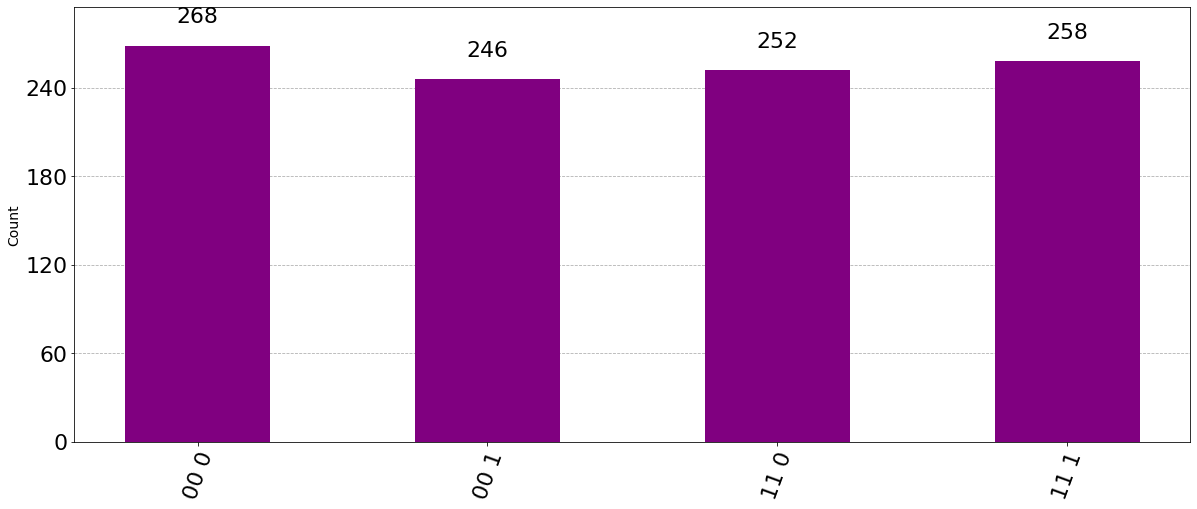

In [231]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, c_aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
circuit.measure(aux[0], c_aux[0])

circuit.measure(data[0], c_data[0])
circuit.measure(data[1], c_data[1])


circuit.draw('mpl')

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')


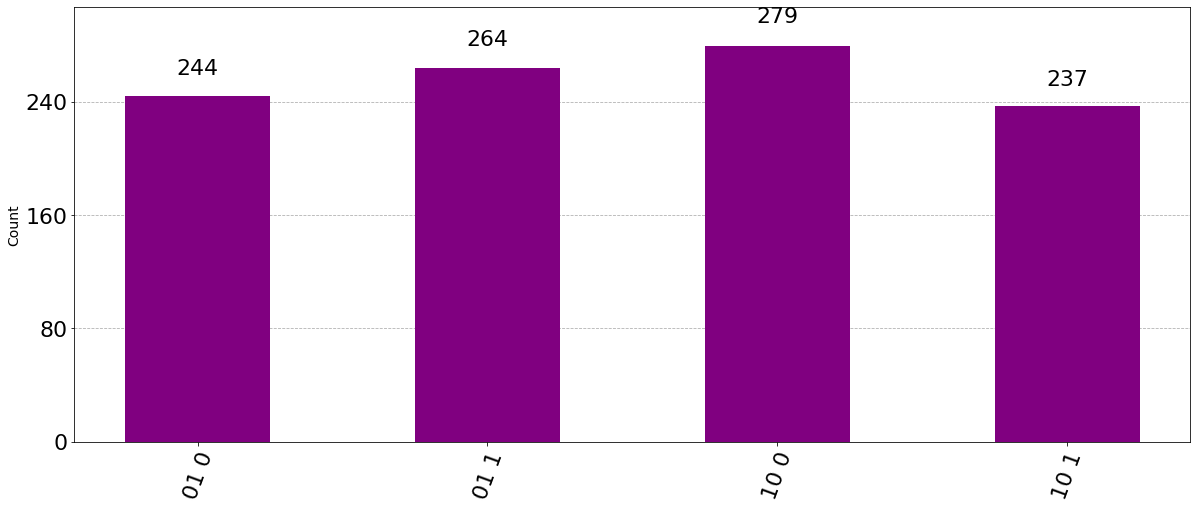

In [232]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(2, 'data')        


c_flag = ClassicalRegister(1, 'c_flag')  
c_aux = ClassicalRegister(1, 'c_aux')   
c_data = ClassicalRegister(2, 'c_data')

circuit = QuantumCircuit(data, aux, c_aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.barrier()
circuit.h(aux[0])
circuit.barrier()
#circuit.cx(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
#circuit.cx(aux[0], data[1])

circuit.barrier()

#circuit.y(0)#An error does nothing
#circuit.y(1)#An error does nothing
#circuit.y(3)#An error does nothing
#circuit.x(3)#An error does nothing
#circuit.x(4)#An error does nothing

#circuit.x(aux[0])
#circuit.x(aux[0])
#circuit.x(aux[0])

circuit.x(data[0])
# Define noise model
noise_model = NoiseModel()
# Depolarizing error: prob=0.2, 1-qubit gate
depol_error = depolarizing_error(1, num_qubits=1)

# Add the noise to the identity gate on ancilla (qubit 2 in layout)
noise_model.add_quantum_error(depol_error, ['id'], [0])  # Qubit 2 = aux[0]


circuit.cy(aux[0], data[0])
#circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[1])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()

#circuit.measure(flag[0], c_flag[0])
circuit.measure(aux[0], c_aux[0])

circuit.measure(data[0], c_data[0])
circuit.measure(data[1], c_data[1])


circuit.draw('mpl')

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')




In [233]:
#from qiskit.quantum_info.operators.symplectic import Pauli
#op = Pauli('I')
#statevector.expectation_value(op)

# Fig 2

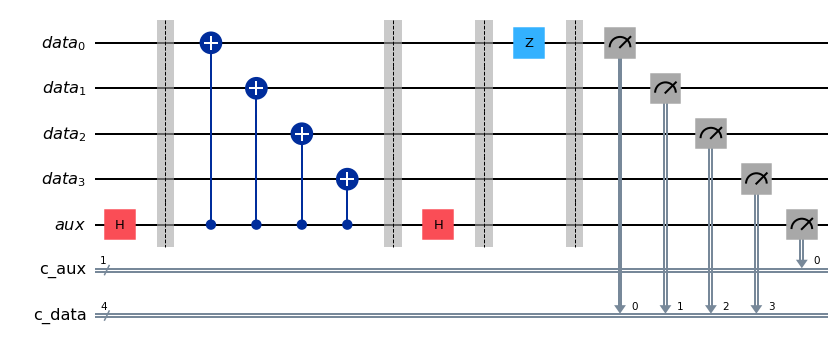

In [27]:
aux = QuantumRegister(1, 'aux')         
#flag = QuantumRegister(1, 'flag')        
data = QuantumRegister(4, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   

c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, c_aux, c_data) # Order is data, ancilla and control qubit from what I understand 

circuit.h(aux[0])

circuit.barrier()

for i in range(4):
    circuit.cx(aux[0], data[i])

circuit.barrier()
circuit.h(aux[0])

circuit.barrier()
circuit.z(data[0])
circuit.barrier()

for i in range(4):
    circuit.measure(data[i], c_data[i])

circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


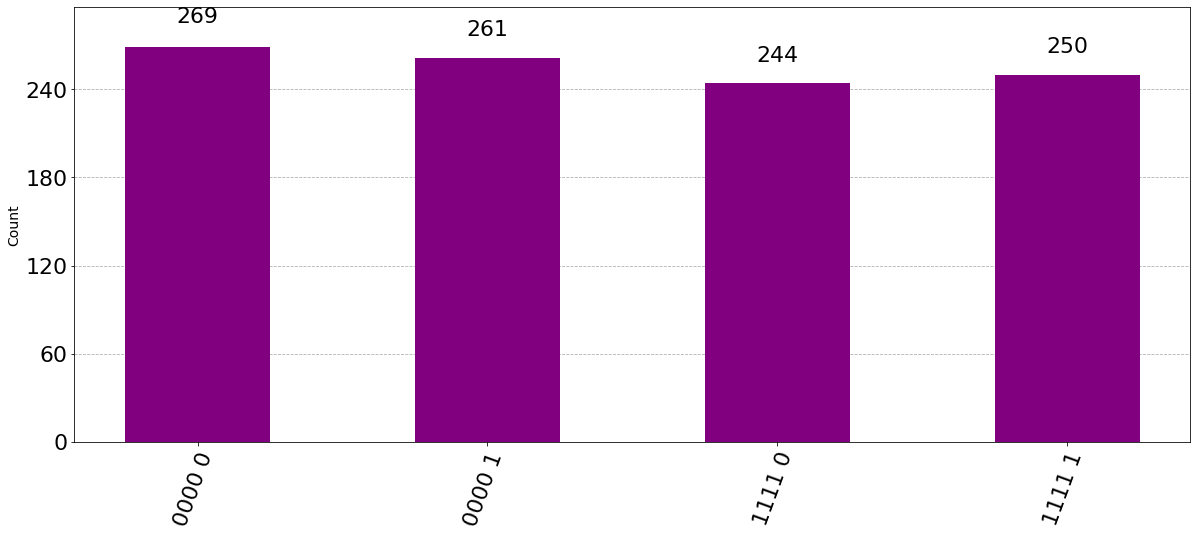

In [28]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

# Fig 3 (Non-FT Preparation)

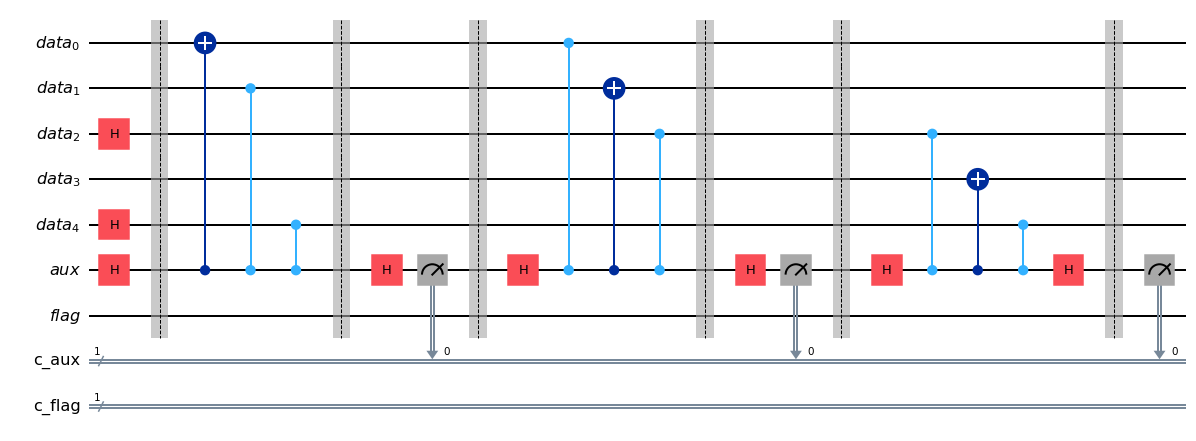

In [33]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        

data = QuantumRegister(5, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   
c_flag = ClassicalRegister(1, 'c_flag')
#c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag) # Order is data, ancilla and control qubit from what I understand 

circuit.h(aux[0])
circuit.h(2) # To put it in the + state
circuit.h(4) # To put it in the + state

circuit.barrier()
circuit.cx(aux[0], data[0])
circuit.cz(aux[0], data[1])
circuit.cz(aux[0], data[4])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()

circuit.h(aux[0])
circuit.cz(aux[0], data[0])

circuit.cx(aux[0], data[1])
circuit.cz(aux[0], data[2])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does

circuit.barrier()
circuit.h(aux[0])
circuit.cz(aux[0], data[2])
circuit.cx(aux[0], data[3])
circuit.cz(aux[0], data[4])
circuit.h(aux[0])
circuit.barrier()
circuit.measure(aux[0], c_aux) #not sure what this measurement does




#circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


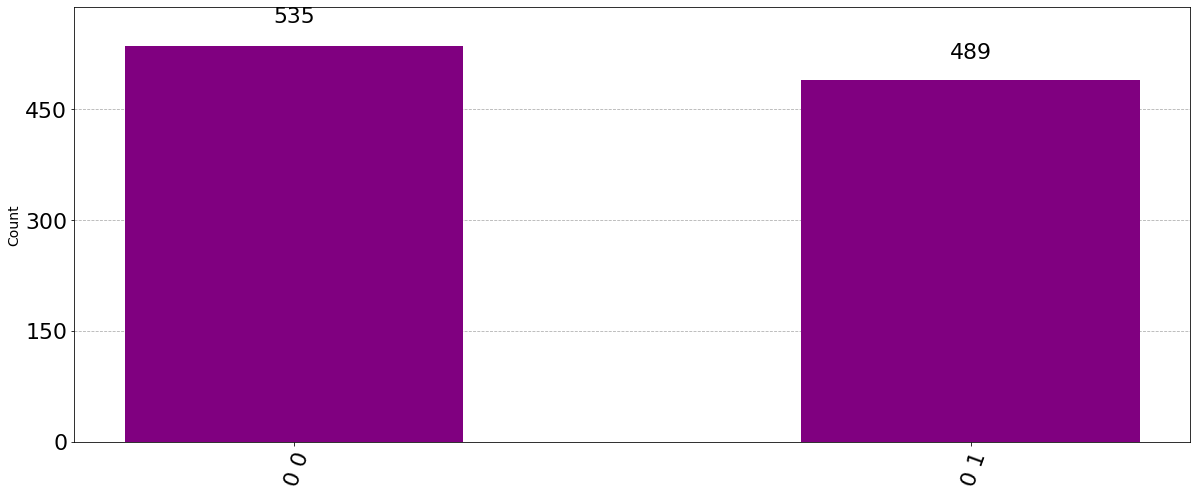

In [34]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')

# Fig 3 (FT Preparation)

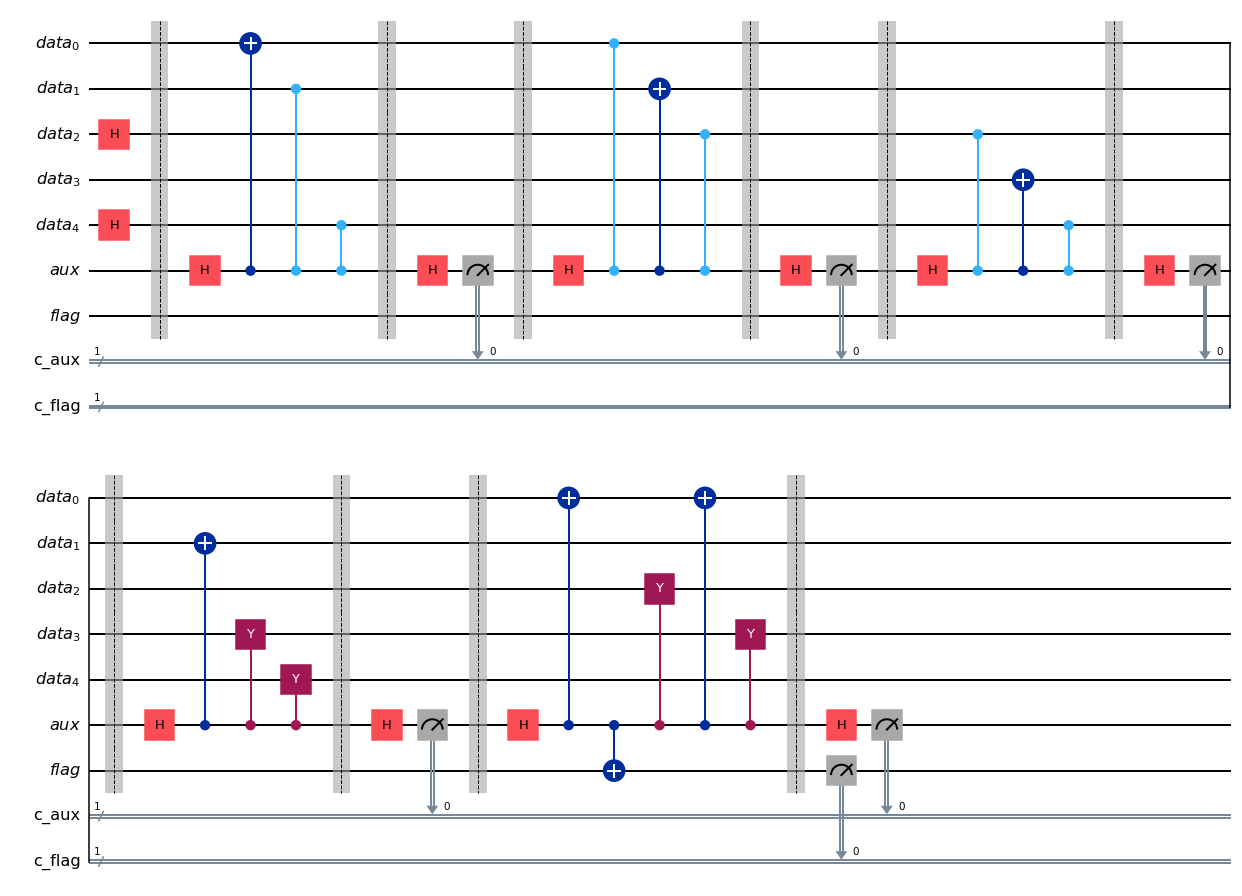

In [42]:
aux = QuantumRegister(1, 'aux')         
flag = QuantumRegister(1, 'flag')        

data = QuantumRegister(5, 'data')        


c_aux = ClassicalRegister(1, 'c_aux')   
c_flag = ClassicalRegister(1, 'c_flag')
#c_data = ClassicalRegister(4, 'c_data')   

circuit = QuantumCircuit(data, aux, flag, c_aux, c_flag) # Order is data, ancilla and control qubit from what I understand 

circuit.h(2) # To put it in the + state
circuit.h(4) # To put it in the + state


circuit.barrier()
circuit.h(aux[0])

circuit.cx(aux[0], data[0])
circuit.cz(aux[0], data[1])
circuit.cz(aux[0], data[4])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()

circuit.h(aux[0])
circuit.cz(aux[0], data[0])

circuit.cx(aux[0], data[1])
circuit.cz(aux[0], data[2])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does

circuit.barrier()
circuit.h(aux[0])
circuit.cz(aux[0], data[2])
circuit.cx(aux[0], data[3])
circuit.cz(aux[0], data[4])
circuit.barrier()

circuit.h(aux[0])
circuit.measure(aux[0], c_aux) #not sure what this measurement does
circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[1])
circuit.cy(aux[0], data[3])
circuit.cy(aux[0], data[4])
circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux)

circuit.barrier()
circuit.h(aux[0])
circuit.cx(aux[0], data[0])
circuit.cx(aux[0], flag[0])
circuit.cy(aux[0], data[2])
circuit.cx(aux[0], data[0])
circuit.cy(aux[0], data[3])

circuit.barrier()
circuit.h(aux[0])
circuit.measure(aux[0], c_aux)
circuit.measure(flag[0], c_flag)


#circuit.measure(aux[0], c_aux)
circuit.draw('mpl')


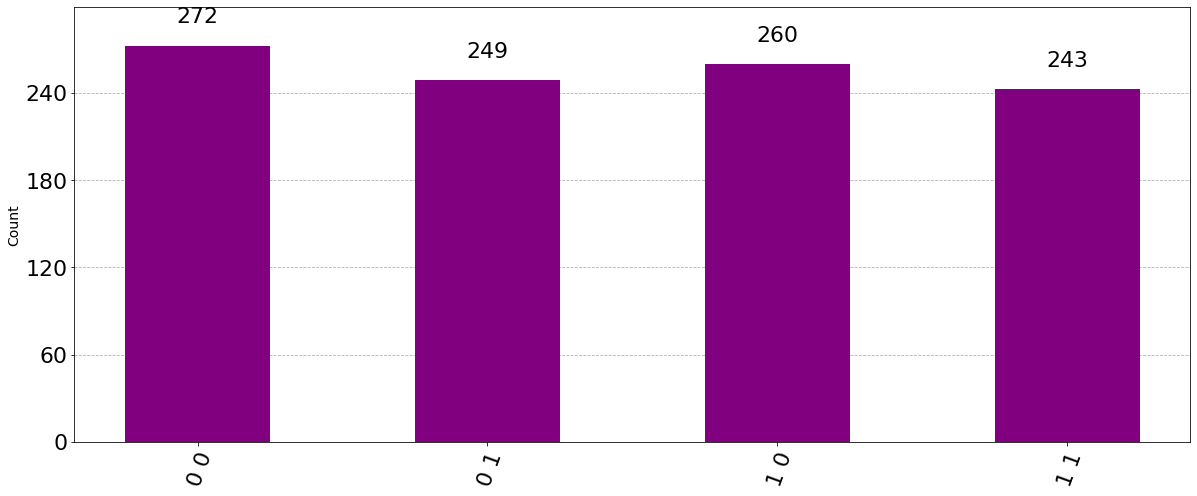

In [43]:

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
plot_histogram(result.get_counts(),figsize=(20,8), color = 'purple')